## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task 2: Data Visualization

1. First we will check if the data is clean and in a usable state

In [2]:
# Define a function to observe basic dataset stats

def observe_data(dataset, stats=True):
    '''
    Shows basic dataset info and statistics if stats=True.
    Shows missing values in dataset.
    '''
    
    from IPython.display import display
    
    if stats == True:
        # Display dataset info and dtypes
        print("\nDataset info and dtypes:")
        display(dataset.info())

        # Display basic dataset stats
        print("\n\nBasic dataset statistics:")
        display(dataset.describe())

    # Quantify missing values
    print("\n\nMissing values quantified:")
    missing_values = pd.DataFrame(dataset.isnull().sum())
    missing_percent = pd.DataFrame(missing_values/len(dataset)*100)
    missing = pd.concat([missing_values, missing_percent], axis=1)
    missing.columns = ['Missing values', '%']
    missing = missing.sort_values(by='Missing values', ascending=False)
    display(missing[missing['Missing values'] > 0])
    
    # Visualize missing values
    print("\n\nMissing values visualized:")
    sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.show()


Dataset info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Full Name                9398 non-null   object        
 1   Gender                   9398 non-null   object        
 2   Current Annual Salary    9398 non-null   float64       
 3   2017 Gross Pay Received  9398 non-null   float64       
 4   2017 Overtime Pay        9398 non-null   float64       
 5   Department               9398 non-null   object        
 6   Department Name          9398 non-null   object        
 7   Division                 9398 non-null   object        
 8   Assignment Category      9398 non-null   object        
 9   Employee Position Title  9398 non-null   object        
 10  Position Under-Filled    1088 non-null   object        
 11  Date First Hired         9398 non-null   datetime64[ns]
 12  Zip     

None



Basic dataset statistics:


,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Zip
count,9398.000000,9398.000000,9398.000000,9398.000000
mean,75571.149354,79651.300220,7001.849431,20728.365716
std,29875.189537,36965.189238,12248.901787,48.416432
min,11147.240000,0.000000,-2430.110000,20607.000000
25%,53747.000000,55561.675000,0.000000,20710.000000
50%,71495.000000,76972.330000,1592.405000,20740.000000
75%,95084.420000,101210.797500,9189.180000,20769.000000
max,303091.000000,315216.400000,125274.890000,20785.000000




Missing values quantified:


,Missing values,%
Position Under-Filled,8310,88.423069




Missing values visualized:


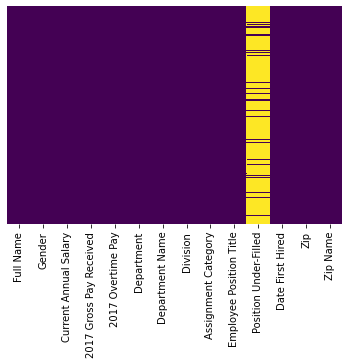

In [3]:
df_salaries = pd.read_excel(r"C:/Users/sriha/OneDrive/Desktop/DS/Case Studiess/Qureos - Weber Shandwick/Employee_Salaries.xlsx")

observe_data(df_salaries)

### Observations: 

We notice some oddities in the data:


1. The column "Position Under-Filled" is mostly null values. Check if the null values represent a yes/no value. 
    - As shown in the data snippet below, this is not a value we can meaningfully impute. We will ignore this column for now, and drop it if required later. 


2. The column "2017 Overtime Pay" has one or more negative values. This doesn't make sense. Explore the column to figure out the reason for this value
    - There is a single value with negative overtime pay. This number is quite specific so we just change it to the absolute value to deal with the anomaly.


Apart from this, the dataset appears to be in a relatively clean form




In [4]:
df_salaries.head()

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired,Zip,Zip Name
0,Employee1,F,70959.79,71316.72,0.00,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,NaN,1986-09-22,20782,Chillum
1,Employee2,F,110359.00,108040.82,0.00,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Supervisory Social Worker,NaN,1989-11-19,20705,Beltsville
2,Employee3,M,55950.24,62575.19,7649.19,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,NaN,2014-05-05,20781,Hyattsville
3,Employee4,M,95740.00,96055.94,0.00,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,NaN,2007-03-05,20707,Laurel
4,Employee5,M,74732.00,98736.78,23468.73,POL,Department of Police,PSB 6th District Special Assignment Team,Fulltime-Regular,Police Officer III,NaN,2007-07-16,20705,Beltsville


In [5]:
# Explore data for cleaning

df_salaries[df_salaries["2017 Overtime Pay"] < 0]

,Full Name,Gender,Current Annual Salary,2017 Gross Pay Received,2017 Overtime Pay,Department,Department Name,Division,Assignment Category,Employee Position Title,Position Under-Filled,Date First Hired,Zip,Zip Name
5143,Employee5144,M,159601.76,144677.21,-2430.11,POL,Department of Police,PSB 2nd District Station,Fulltime-Regular,Police Captain,NaN,1994-01-18,20716,Bowie


In [6]:
df_salaries["2017 Overtime Pay"] = abs(df_salaries["2017 Overtime Pay"])

In [7]:
# Export cleaned dataset to visualize in Tableau

df_salaries.to_excel(r"C:/Users/sriha/OneDrive/Desktop/DS/Case Studiess/Qureos - Weber Shandwick/Cleaned/Employee_Salaries_Clean.xlsx")